In [1]:
cd /Users/kimberlyalexander/Projects/PyCon2015AzureTutorial/_NOTEBOOKS/_FILES/

/Users/kimberlyalexander/Projects/PyCon2015AzureTutorial/_NOTEBOOKS/_FILES


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

//anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

<hr/>

"The Olive Oils data has eight explanatory variables (levels of fatty acids in the oils) and nine classes (areas of Italy).  The content of the oils is a subject of study in its own right: Olive oil has high nutritional value, and some of its constituent fatty acids are considered to be more beneficial than others."

In [3]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [6]:
olive_oil = pd.read_csv('olive.csv') 
olive_oil.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [7]:
olive_oil.shape

(572, 11)

In [8]:
olive_oil.rename(columns = {olive_oil.columns[0]:'area_Idili'}, inplace = True) 
olive_oil.head(5)

,area_Idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [9]:
pd.DataFrame(olive_oil.columns)

,0
0,area_Idili
1,region
2,area
3,palmitic
4,palmitoleic
5,stearic
6,oleic
7,linoleic
8,linolenic
9,arachidic


In [11]:
unique_in_region = olive_oil.region.unique() # We will find how many unique entries are there in region column.
unique_in_area = olive_oil.area.unique()
print unique_in_region
print unique_in_area330
+

[1 2 3]
[1 2 3 4 5 6 9 7 8]


In [13]:
pd.crosstab(olive_oil.area, olive_oil.region) 

region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [14]:
olive_oil.head(5)

,area_Idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [15]:
olive_oil.area_Idili = olive_oil.area_Idili.map(lambda x: x.split('.')[-1]) 
olive_oil.head()

,area_Idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [16]:
# How the split function works 
x = '1.northapulia'
y = x.split('.')
print y
z = x.split('.')[-1] #-1 returns the last element of the list
z

['1', 'northapulia']


'northapulia'

In [17]:
olive_oil[['palmitic', 'palmitoleic']].head(5) # you can access subset of columns of a data frame. (http://bit.ly/1sPHf1u)

,palmitic,palmitoleic
0,1075,75
1,1088,73
2,911,54
3,966,57
4,1051,67


In [18]:
olive_oil['palmitic']

0     1075
1     1088
2      911
3      966
4     1051
5      911
6      922
7     1100
8     1082
9     1037
10    1051
11    1036
12    1074
13     875
14     952
...
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, Length: 572, dtype: int64

In [19]:
print " the type of olive_oil[['palmitic']]: \t", type(olive_oil[['palmitic']])
print " the type of olive_oil['palmitic']: \t", type(olive_oil['palmitic'])


 the type of olive_oil[['palmitic']]: 	<class 'pandas.core.frame.DataFrame'>
 the type of olive_oil['palmitic']: 	<class 'pandas.core.series.Series'>


In [20]:
olive_oil.palmitic # this is a convienient way to access a specific column

0     1075
1     1088
2      911
3      966
4     1051
5      911
6      922
7     1100
8     1082
9     1037
10    1051
11    1036
12    1074
13     875
14     952
...
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, Length: 572, dtype: int64

What map did is it took a pandas series in form of a list. Took that list and mapped each value of that list to something. here we are going to use a data frame( set of lists). for data frame you should use apply

In [15]:
list_of_acids =['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
df = olive_oil[list_of_acids].apply(lambda x: x/100.0)
df.head(5)

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


In [22]:
olive_oil[list_of_acids] =df # we are replacing the acid list values in olive_oil
olive_oil.head(5)

,area_Idili,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


(array([   1.,    0.,   11.,   71.,  188.,   79.,  131.,   73.,    9.,    9.]),
 array([  6.1  ,   7.243,   8.386,   9.529,  10.672,  11.815,  12.958,
         14.101,  15.244,  16.387,  17.53 ]),
 <a list of 10 Patch objects>)

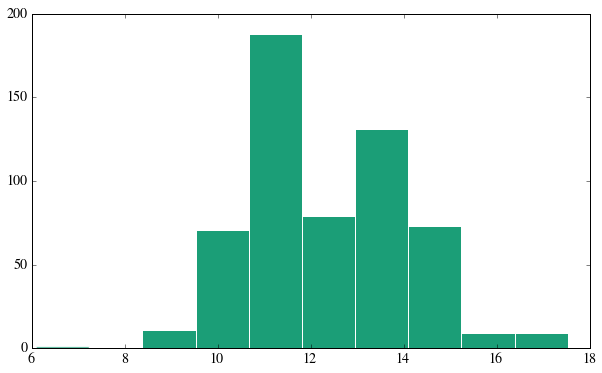

In [19]:
plt.hist(olive_oil.palmitic)

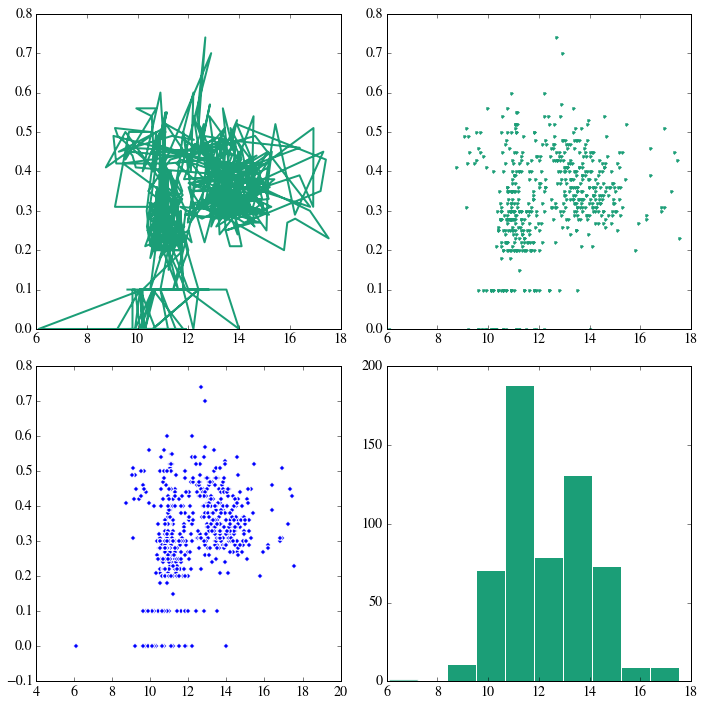

In [23]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(olive_oil.palmitic, olive_oil.linolenic)
axes[0][1].plot(olive_oil.palmitic, olive_oil.linolenic, '.')
axes[1][0].scatter(olive_oil.palmitic, olive_oil.linolenic)
axes[1][1].hist(olive_oil.palmitic)
fig.tight_layout()

In [20]:
region_groupby = olive_oil.groupby('region')
grp_reg=region_groupby.describe()
grp_reg.head(20)

arachidic        area  eicosenoic    linoleic   linolenic       oleic    palmitic  palmitoleic     stearic
region                                                                                                                   
1      count  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000   323.000000  323.000000
       mean     0.631176    2.783282    0.273220   10.334985    0.380650   71.000093   13.322879     1.548019    2.287740
       std      0.111644    0.741054    0.083915    2.106730    0.079727    3.451431    1.529349     0.507237    0.398709
       min      0.320000    1.000000    0.100000    4.480000    0.200000   63.000000    8.750000     0.350000    1.520000
       25%      0.560000    2.500000    0.220000    8.555000    0.320000   68.830000   12.680000     1.215000    2.015000
       50%      0.620000    3.000000    0.270000   10.900000    0.370000   70.300000   13.460000     1.630000    2.230000
       75%      0.690000    3.000000    0.320000   12.025000    0.440000   72.835000   14.190000     1.850000    2.495000
       max      1.020000    4.000000    0.580000   14.620000    0.740000   81.130000   17.530000     2.800000    3.750000
2      count   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000    98.000000   98.000000
       mean     0.731735    5.336735    0.019388   11.965306    0.270918   72.680204   11.113469     0.967449    2.261837
       std      0.118826    0.475023    0.007436    1.072336    0.053844    1.418783    0.404111     0.138514    0.176363
       min      0.450000    5.000000    0.010000   10.570000    0.150000   68.820000   10.300000     0.350000    1.990000
       25%      0.660000    5.000000    0.010000   11.122500    0.230000   71.372500   10.852500     0.882500    2.120000
       50%      0.720000    5.000000    0.020000   11.465000    0.270000   73.255000   11.075000     0.960000    2.220000
       75%      0.810000    6.000000    0.020000   13.065000    0.300000   73.810000   11.372500     1.040000    2.395000
       max      1.050000    6.000000    0.030000   14.700000    0.430000   74.390000   12.130000     1.350000    2.720000
3      count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   151.000000  151.000000
       mean     0.375762    8.006623    0.019735    7.270331    0.217881   77.930530   10.948013     0.837351    2.308013
       std      0.293586    0.820542    0.007298    1.431226    0.168865    1.648155    0.825635     0.264388    0.389560
       min      0.000000    7.000000    0.010000    5.100000    0.000000   73.400000    6.100000     0.150000    1.700000

In [21]:
olstd = olive_oil.groupby('region').std()
olstd

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [22]:
olmean=region_groupby.aggregate(np.mean)
olmean.head()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


In [23]:
renamedict_std={k:k+"_std" for k in list_of_acids}
renamedict_mean={k:k+"_mean" for k in list_of_acids}
olstd.rename(columns=renamedict_std,inplace=True)
olmean.rename(columns=renamedict_mean,inplace=True) 
olstd.head()

,area,palmitic_std,palmitoleic_std,stearic_std,oleic_std,linoleic_std,linolenic_std,arachidic_std,eicosenoic_std
region,,,,,,,,,
1,0.741054,1.529349,0.507237,0.398709,3.451431,2.106730,0.079727,0.111644,0.083915
2,0.475023,0.404111,0.138514,0.176363,1.418783,1.072336,0.053844,0.118826,0.007436
3,0.820542,0.825635,0.264388,0.389560,1.648155,1.431226,0.168865,0.293586,0.007298


In [24]:
olpalmiticmean = olmean[['palmitic_mean']] 
olpalmiticstd = olstd[['palmitic_std']] 
newolbyregion=olpalmiticmean.join(olpalmiticstd)
newolbyregion

,palmitic_mean,palmitic_std
region,,
1,13.322879,1.529349
2,11.113469,0.404111
3,10.948013,0.825635


In [30]:
eico=(olive_oil.eicosenoic < 0.05)
eico

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
557    True
558    True
559    True
560    True
561    True
562    True
563    True
564    True
565    True
566    True
567    True
568    True
569    True
570    True
571    True
Name: eicosenoic, Length: 572, dtype: bool

In [21]:
new_data = pd.DataFrame({'Bigdata' : [12, 34, 99, 45, 13], \
'Examiner' : [0.9, 0.8, 0.7, 0.6, None], 'Data science' \
: ['L', 'M', None, 'c', 'a']})
new_data

,Bigdata,Data science,Examiner
0,12,L,0.9
1,34,M,0.8
2,99,None,0.7
3,45,c,0.6
4,13,a,NaN


In [22]:
new_data.dropna()

,Bigdata,Data science,Examiner
0,12,L,0.9
1,34,M,0.8
3,45,c,0.6


In [30]:
data = pd.DataFrame([1., None, 3.5, None, 7])
data

,0
0,1.0
1,NaN
2,3.5
3,NaN
4,7.0


In [31]:
mean = data.mean()
data.fillna(mean)

,0
0,1.000000
1,3.833333
2,3.500000
3,3.833333
4,7.000000
